Nama : Daniel Sutan Sitompul
https://www.kaggle.com/datasets/kishanyadav/inshort-news

In [1]:
import pandas as pd
import seaborn as sns
import io
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Flatten, Dropout, Dense

sns.set()
%matplotlib inline

In [2]:
from google.colab import files
import warnings
warnings.filterwarnings('ignore')
files = files.upload()

Saving inshort_news_data-1.csv to inshort_news_data-1.csv
Saving inshort_news_data-2.csv to inshort_news_data-2.csv
Saving inshort_news_data-3.csv to inshort_news_data-3.csv
Saving inshort_news_data-4.csv to inshort_news_data-4.csv
Saving inshort_news_data-5.csv to inshort_news_data-5.csv
Saving inshort_news_data-6.csv to inshort_news_data-6.csv
Saving inshort_news_data-7.csv to inshort_news_data-7.csv


In [4]:
berita1 = pd.read_csv(io.BytesIO(files['inshort_news_data-1.csv']))
berita2 = pd.read_csv(io.BytesIO(files['inshort_news_data-2.csv']))
berita3 = pd.read_csv(io.BytesIO(files['inshort_news_data-3.csv']))
berita4 = pd.read_csv(io.BytesIO(files['inshort_news_data-4.csv']))
berita5 = pd.read_csv(io.BytesIO(files['inshort_news_data-5.csv']))
berita6 = pd.read_csv(io.BytesIO(files['inshort_news_data-6.csv']))
berita7 = pd.read_csv(io.BytesIO(files['inshort_news_data-7.csv']))

In [5]:
data = [berita1, berita2, berita3, berita4, berita5, berita6, berita7]
df = pd.concat(data, axis=0, ignore_index=True)
df.head()

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology


In [6]:
data = [berita1, berita2, berita3, berita4, berita5, berita6, berita7]
df = pd.concat(data, axis=0, ignore_index=True)
df.head()

,Unnamed: 0,news_headline,news_article,news_category
0,0,50-year-old problem of biology solved by Artif...,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,1,Microsoft Teams to stop working on Internet Ex...,Microsoft Teams will stop working on Internet ...,technology
2,2,Hope US won't erect barriers to cooperation: C...,"China, in response to reports of US adding Chi...",technology
3,3,Global smartphone sales in Q3 falls 5.7% to 36...,The global smartphone sales in the third quart...,technology
4,4,EU hoping Biden will clarify US position on di...,The European Union (EU) is hoping that US Pres...,technology


In [7]:
df.shape

(12120, 4)

In [8]:
df = df.drop(['Unnamed: 0', 'news_headline'], axis=1)
df.head()

,news_article,news_category
0,DeepMind's AI system 'AlphaFold' has been reco...,technology
1,Microsoft Teams will stop working on Internet ...,technology
2,"China, in response to reports of US adding Chi...",technology
3,The global smartphone sales in the third quart...,technology
4,The European Union (EU) is hoping that US Pres...,technology


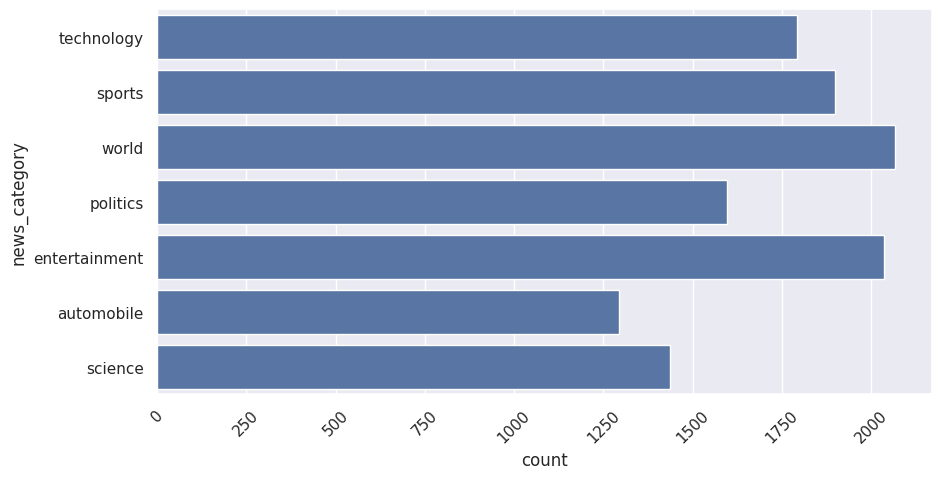

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(df['news_category'])
plt.xticks(rotation=45)
plt.show()

In [10]:
review = pd.get_dummies(df['news_category'])
df2 = pd.concat([df, review], axis=1)
df2 = df2.drop('news_category', axis=1)
df2.head()


,news_article,automobile,entertainment,politics,science,sports,technology,world
0,DeepMind's AI system 'AlphaFold' has been reco...,0,0,0,0,0,1,0
1,Microsoft Teams will stop working on Internet ...,0,0,0,0,0,1,0
2,"China, in response to reports of US adding Chi...",0,0,0,0,0,1,0
3,The global smartphone sales in the third quart...,0,0,0,0,0,1,0
4,The European Union (EU) is hoping that US Pres...,0,0,0,0,0,1,0


In [11]:

X = df2['news_article'].values
y = df2.drop('news_article', axis=1).values
#split jadi train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
tokenizer = Tokenizer(num_words=5000, oov_token='n')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)
padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.90):
      print('\nakurasi telah mencapai 90%')
      self.model.stop_training = True

callbacks = myCallback()
model = Sequential([
                    Embedding(input_dim=10000, output_dim=128),
                    LSTM(128),
                    Flatten(),
                    Dropout(0.5),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(7, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(padded_train, y_train, epochs=62, validation_data=(padded_test, y_test), callbacks=[callbacks], batch_size=184)


Epoch 1/62
53/53 [==============================] - 29s 489ms/step - loss: 1.7836 - accuracy: 0.2310 - val_loss: 1.3731 - val_accuracy: 0.3989
Epoch 2/62
53/53 [==============================] - 22s 420ms/step - loss: 1.0207 - accuracy: 0.6015 - val_loss: 0.6368 - val_accuracy: 0.7921
Epoch 3/62
53/53 [==============================] - 22s 410ms/step - loss: 0.4416 - accuracy: 0.8658 - val_loss: 0.3635 - val_accuracy: 0.8919
Epoch 4/62
53/53 [==============================] - ETA: 0s - loss: 0.2570 - accuracy: 0.9284
akurasi telah mencapai 90%
53/53 [==============================] - 23s 429ms/step - loss: 0.2570 - accuracy: 0.9284 - val_loss: 0.2795 - val_accuracy: 0.9183


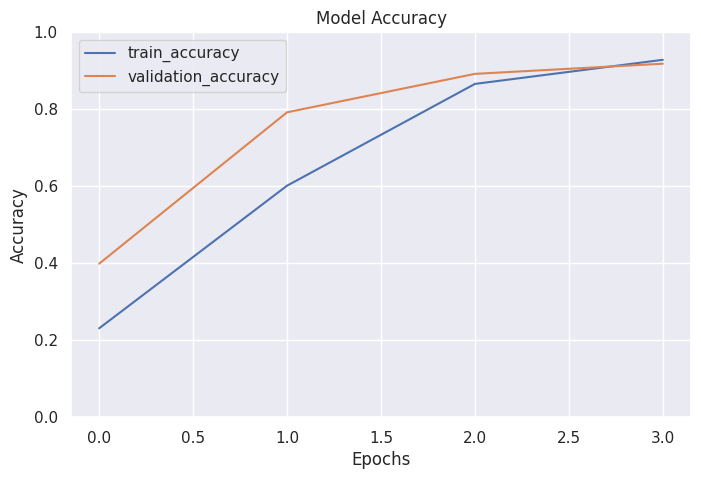

In [14]:
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(ymin=0, ymax=1)
plt.show()

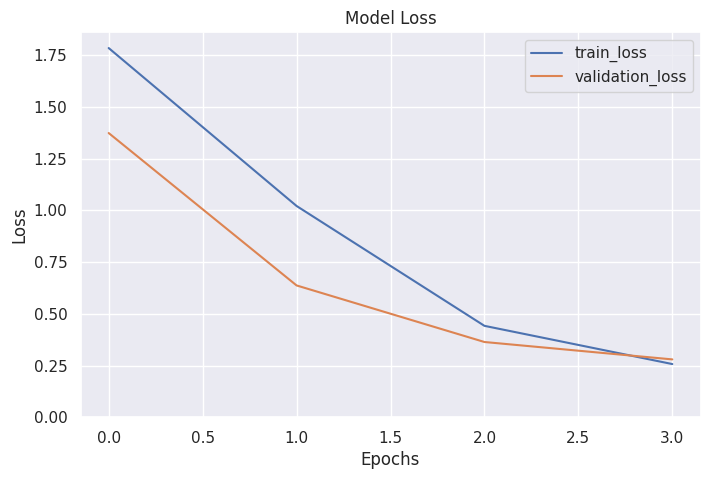

In [15]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(ymin=0)
plt.show()